In [ ]:
# polynomial regression mengambil hubungan yg melengkung

# rumus polynomial
# B = Beta/ koefisien yg diseting model nya
# y = b0 + b1x + b2x^2 + b3x^3 + b4x^4

# jika ingin mencari koss function maka gunakan turunan


# decission tree regression

# gini implicity untuk melihat model bercampur dengan yg lain, pengertiannya cari di gpt aja

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [2]:
data = fetch_california_housing(as_frame=True)

In [3]:
df = data.frame

In [4]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [5]:
x = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [6]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=42)

# Polynomial Regression

In [7]:
poly_reg = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=True),
    LinearRegression()
)
#jumlah pangkat yg dimiliki, jika 3 maka sampe x^3
# b0 x 1

In [8]:
poly_reg.fit(X_Train, Y_Train)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [9]:
y_pred_pol = poly_reg.predict(X_Test)

In [10]:
print(y_pred_pol[0:10], '\n')

print(Y_Test[0:10])

[0.71729465 1.83221913 4.05637431 2.69926666 2.71763177 1.81321467
 2.6291794  1.68999457 2.52491024 4.36501657] 

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
13311    1.58700
7113     1.98200
7668     1.57500
18246    3.40000
5723     4.46600
Name: MedHouseVal, dtype: float64


In [11]:
mae = mean_absolute_error(Y_Test, y_pred_pol)
mae

0.47855405464737844

In [12]:
nmae = mae / (y_pred_pol.max() - y_pred_pol.min())
nmae

np.float64(0.0028042267730586366)

c:\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


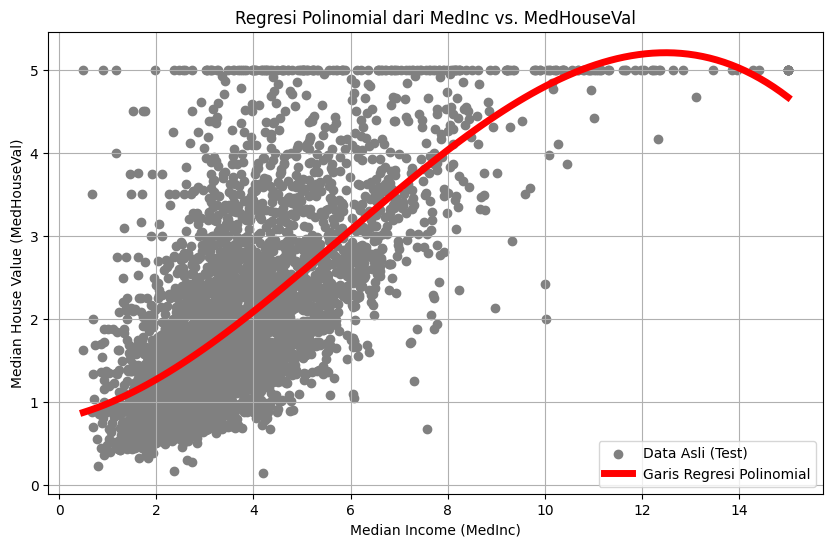

In [ ]:
# dari gemini AI

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Memuat dataset
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target

# Mengambil hanya satu fitur untuk visualisasi
x = df[['MedInc']]  # Menggunakan MedInc sebagai fitur
y = df['MedHouseVal']

# Membagi data
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=42)

# Membuat pipeline regresi polinomial
poly_reg = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=True),
    LinearRegression()
)
poly_reg.fit(X_Train, Y_Train)

# Memprediksi rentang nilai MedInc untuk visualisasi garis regresi
X_range = np.linspace(X_Test.min(), X_Test.max(), 100).reshape(-1, 1)
y_pred_range = poly_reg.predict(X_range)

# Membuat visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(X_Test, Y_Test, color='grey', label='Data Asli (Test)')
plt.plot(X_range, y_pred_range, color='red', linewidth=5, label='Garis Regresi Polinomial')
plt.title('Regresi Polinomial dari MedInc vs. MedHouseVal')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value (MedHouseVal)')
plt.legend()
plt.grid(True)
plt.show()

# visualisasi di bawah ini belum ada di perbaiki

### Visualisasi

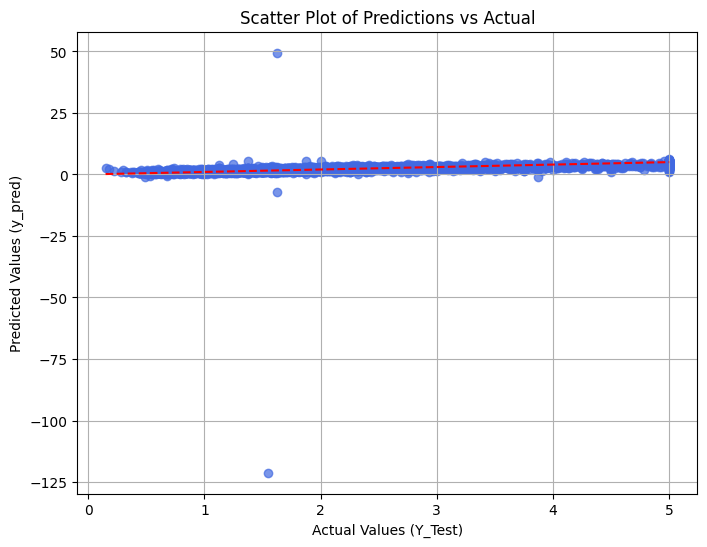

In [ ]:
# belum di perbaiki lagi

plt.figure(figsize=(8, 6))
plt.scatter(Y_Test, y_pred_pol, alpha=0.7, color='royalblue')
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'r--')  # Garis ideal
plt.xlabel('Actual Values (Y_Test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of Predictions vs Actual')
plt.grid(True)
plt.show()

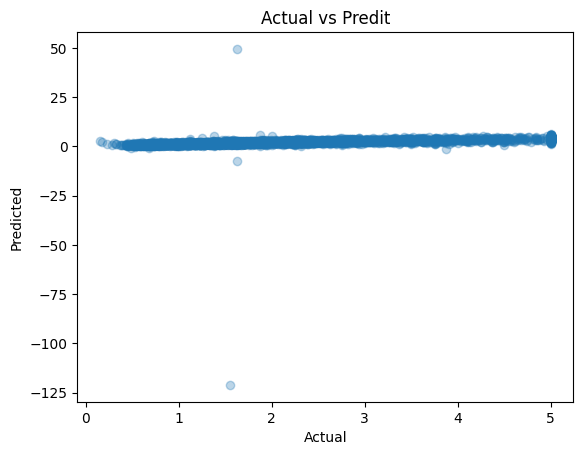

In [15]:
# dari salman       -> masih salah juga
plt.scatter(Y_Test, y_pred_pol, alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predit')
plt.show()

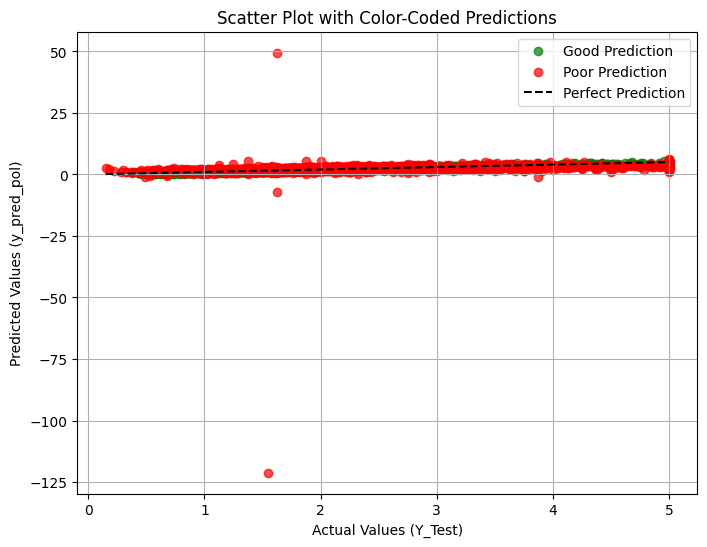

In [16]:
# punya aziz        -> sama aj di aku erro outlier

error = np.abs(y_pred_pol - Y_Test)
threshold = 0.5
good_pred = error <= threshold
bad_pred = error > threshold
plt.figure(figsize=(8, 6))
plt.scatter(Y_Test[good_pred], y_pred_pol[good_pred], alpha=0.7, color='green', label='Good Prediction')
plt.scatter(Y_Test[bad_pred], y_pred_pol[bad_pred], alpha=0.7, color='red', label='Poor Prediction')
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', label='Perfect Prediction')
plt.xlabel('Actual Values (Y_Test)')
plt.ylabel('Predicted Values (y_pred_pol)')
plt.title('Scatter Plot with Color-Coded Predictions')
plt.legend()
plt.grid(True)
plt.show()

# Decission Tree

In [17]:
model_dec = DecisionTreeRegressor(max_depth=5, random_state=42)

In [18]:
model_dec.fit(X_Train, Y_Train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [19]:
y_pred_dec = model_dec.predict(X_Test)

In [20]:
nmae_dec = mean_absolute_error(Y_Test, y_pred_dec) / (y_pred_dec.max() - y_pred_dec.min())
nmae_dec

np.float64(0.13084839785402397)